In [3]:
# Import libraries
import statistics as stat
import pandas as pd
from scipy import optimize,arange
import numpy as np
from IPython.display import Image
import matplotlib.pyplot as plt

import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt


############ VÆLG LAND (US ELLER UK) ##################
country = "UK"

if country == "US":
    df = pd.read_csv('../data/V3_timeseries__postrev_I1Y_19-Oct-2018.csv')
else:
    df = pd.read_csv('../data/V3_timeseries__postrev_I1Y_19-Oct-2018-UK.csv', delimiter=";")
#######################################################

#select relevant series, set year as index, create copy
df = df[['year','ProfitK','ProfitY','RF', 'growthpop','priceinvt','PD','growthTFP','ik','EmpPop']]
df = df.set_index('year')
df = df.loc[1984:2016]

df_2 = df.copy()
# Calculate averages and insert to DataFrame
for var in list(df.columns):
        
    ma = df[var].rolling(window=11,center=True,min_periods=11).mean()
    ma_name = str("MA_") + str(var)
    df_2[ma_name] = ma

# Make Dictionary for data-series
series = {
    "ProfitK": "Gross profitability",
    "ProfitY": "Capital Share",
    "RF": "Short term real interest rate",
    "growthpop": "Growth in population",
    "priceinvt": "Change in investment prices",
    "PD": "Price-Dividend ratio on stocks",
    "growthTFP": "Growth in Total Factor Productivity",
    "ik":"Ratio of investment to capital",
    "EmpPop": "Share of population employed",
    "Gap": "Gap (Gross profitability to Short term real interest rate)",
}

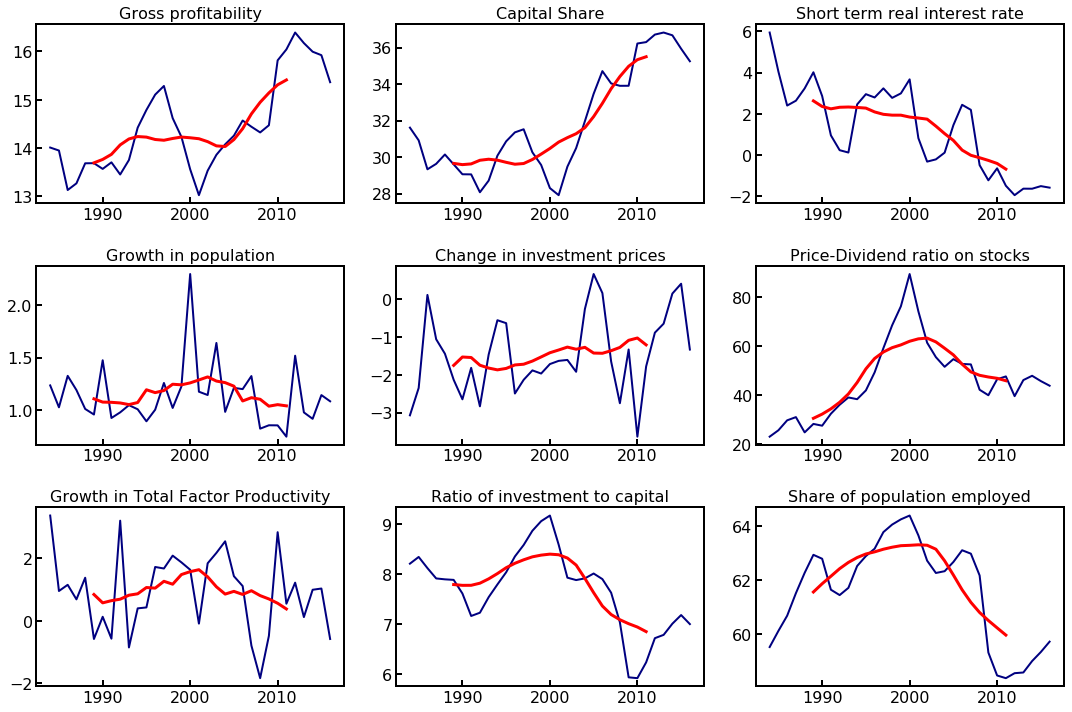

In [2]:

show = 1

fig, axes = plt.subplots(nrows=3, ncols=3,figsize=(15,10),linewidth=2)
for i in range(0,3):
    for j in range(0,3):
        
        graph_id = i*3+j
        var = df.columns[graph_id]
        
        series1 = str(var)
        series2 = str("MA_") + str(var)
        
        ax=axes[i,j]
        
        ax.set_title(series[var], size=16)
        ax.tick_params(direction='in', width=2, length=6, labelsize=16)
        ax.spines["left"].set_linewidth(2)
        ax.spines["right"].set_linewidth(2)
        ax.spines["top"].set_linewidth(2)
        ax.spines["bottom"].set_linewidth(2)
        
        df_2.plot(kind='line',y=series1, color='navy', ax=ax, legend=False, linewidth=2)
        df_2.plot(kind='line',y=series2, color='red', ax=ax, legend=False, linewidth=3)
        ax.set_xlabel("")  

fig.tight_layout()
fig.subplots_adjust(hspace=0.35)
filename = str("graphs/") + str("all") + str(".pdf")
plt.savefig(filename)
if show == 1: plt.show()
plt.close()